# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [29]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() # Overrides all the styles of the graphs plotted with matplotlib

## Load the data

In [30]:
data = pd.read_csv('real_estate_price_size.csv')

In [31]:
data.head()
data.describe()  # gives dome basic statistics about the data

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [32]:
y = data['price']
x1 = data['size']

### Explore the data

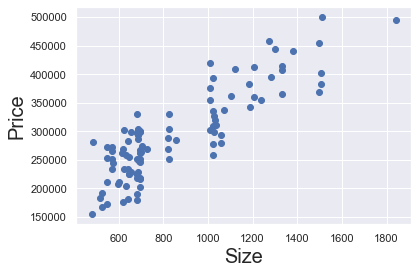

In [33]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Regression itself

In [34]:
x = sm.add_constant(x1) # Adds constant bo to fulfill: y = bo*1 + b1*x1
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           8.13e-31
Time:                        05:45:34   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Playing Around a little bit to get slope and intercept

In [35]:
slope, intercept = py.polyfit(py.log(x1), py.log(y), 1)
slope = round(slope, 4)
intercept = round(intercept, 4)
print(slope, intercept)

0.6766 8.0219


In [36]:
# plt.loglog(x1, y, '--')
# plt.show()

### Plot the regression line on the initial scatter

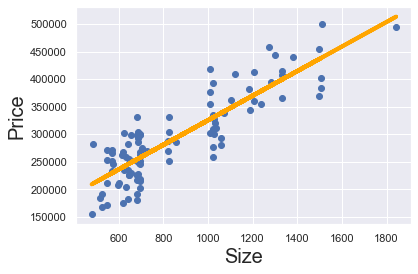

In [37]:
plt.scatter(x1,y)
yhat = 223.1787*x1 + 1.019e+05 # Under coef, const = b0, size = b1
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()